# **Challenge Telecom X - Análisis de Evasión de Clientes**

## **📌Extracción**

**Problema:** Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.  
Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

**Datos:** Los datos de la API de Telecom X están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

**Enlace de la API:** https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/5adf5f2f87a72bd8b2e854db16e2f2f7c499081a/TelecomX_Data.json

In [197]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
url = 'DataBase/TelecomX_Data.json'

In [198]:
# Abrir el archivo json
datos = pd.read_json(url)
datos.head()
# En algunas columnas hay diccionarios que no se habren completamente

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [199]:
# Usamos el modulo json para normalizar el archivo porque hay diccionarios dentro de las columnas
import json

# Cargar los datos desde el archivo JSON
with open('DataBase/TelecomX_Data.json') as f:
    data = json.load(f)

# Normalizar el JSON para aplanar los diccionarios anidados
df = pd.json_normalize(data, sep='.')

# Mostrar las primeras filas
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## **🔧Transformación**

### **Conociendo los datos**

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [201]:
# Verificando duplicados en los Datos
print("Valores duplicados en el DataFrame: ", df.duplicated().sum())

Valores duplicados en el DataFrame:  0


In [202]:
# Observar los valores unicos de categorias
print("\nValores únicos por categoría (para detectar inconsistencias):")
cat_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'customerID']
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")


Valores únicos por categoría (para detectar inconsistencias):
Churn: ['No' 'Yes' '']
customer.gender: ['Female' 'Male']
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes' 'No phone service']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: ['No' 'Yes' 'No internet service']
internet.TechSupport: ['Yes' 'No' 'No internet service']
internet.StreamingTV: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: ['No' 'Yes' 'No internet service']
account.Contract: ['One year' 'Month-to-month' 'Two year']
account.PaperlessBilling: ['Yes' 'No']
account.PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
account.Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


### **Manejo de inconsistencias**

De la informacion sobre que datos unicos hay en cada categoria, podemos observar que en la columna "churn" la cual significa si el cliente dejó o no la empresa, hay 224 filas con espacios en blanco, se puede considerar que estos espacios significan que no ha dejado la empresa, por lo que se podrian cambiar por "No".

In [203]:
# Datos donde hay espacios en blanco en la columna "Churn"
df.loc[df['Churn'] == '']

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [204]:
# Remplasamos los espacios en blanco por la respuesta "No"
df['Churn'] = df['Churn'].replace('', 'No')
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

### **Corrigiendo los tipos de datos**

Remplazamos los valores "Yes" y "No" por 1 y 0 respectivamente para un mejor manejo de los datos en las columnas Churn', 'Partner', 'Dependents', 'PhoneService' y 'PaperlessBilling

In [205]:
binary_cols = ['Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling']
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})

C:\Users\opino\AppData\Local\Temp\ipykernel_13360\2590068650.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})


In [206]:
df[binary_cols] = df[binary_cols].astype(np.int64)

In [207]:
col_categorias = ['customer.gender','phone.MultipleLines','internet.InternetService',
                  'internet.OnlineSecurity','internet.OnlineBackup','internet.DeviceProtection',
                  'internet.TechSupport','internet.StreamingTV','internet.StreamingMovies',
                  'account.Contract','account.PaymentMethod']
# convertir a tipo category algunas columnas tipo object
df[col_categorias] = df[col_categorias].astype('category')

Convertir los valores de la columna "account.Charges.Total" no es posible debido a que hay valores nulos o espacios que reconoce como "string". Pdemos eliminar las filas o dejarlas siempre y cuando no afecte al analisis.  
Por el momento solo eliminaremos el valor, y en caso de haber algun problema mas adelante, seran eleminadas dichas filas

In [208]:
# df['account.Charges.Total'] = df['account.Charges.Total'].astype(np.float64)
nulos = (df['account.Charges.Total'].isna()).sum()
espacios = (df['account.Charges.Total'] == ' ').sum()
sin_valores = (df['account.Charges.Total'] == '').sum()

print('Hay ',nulos, 'valores nulos', '\nHay ',espacios, 'espacios en blanco', '\nHay ',sin_valores,
      'donde no hay valores registrados')


Hay  0 valores nulos 
Hay  11 espacios en blanco 
Hay  0 donde no hay valores registrados


In [209]:
# Eliminar espacios
df['account.Charges.Total'] = df['account.Charges.Total'].str.strip()
# Reemplazar valores vacíos ('') por NaN
df['account.Charges.Total'] = df['account.Charges.Total'].replace('', np.nan)
# Eliminar filas con valores nulos en la columna 'account.Charges.Total'
df = df.dropna(subset=['account.Charges.Total'])
# Convertir a tipo float, forzando conversión segura
df['account.Charges.Total'] = df['account.Charges.Total'].astype(np.float64)
# Convertir a tipo float, forzando conversión segura
#df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

In [210]:
# comprovamos que los datos se cambiaron a float y se eliminaron las 11 filas vacias. Al inicio habia 7267
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7256 non-null   object  
 1   Churn                      7256 non-null   int64   
 2   customer.gender            7256 non-null   category
 3   customer.SeniorCitizen     7256 non-null   int64   
 4   customer.Partner           7256 non-null   int64   
 5   customer.Dependents        7256 non-null   int64   
 6   customer.tenure            7256 non-null   int64   
 7   phone.PhoneService         7256 non-null   int64   
 8   phone.MultipleLines        7256 non-null   category
 9   internet.InternetService   7256 non-null   category
 10  internet.OnlineSecurity    7256 non-null   category
 11  internet.OnlineBackup      7256 non-null   category
 12  internet.DeviceProtection  7256 non-null   category
 13  internet.TechSupport       7256 non-nu

### **Añadir columna cuentas diarias (daily accounts)**

Adaptamos el nombre al formato de los nombres de las columnas de la tabla, que se tienen hasta el momento, pudiendo cambiarlos mas adelante si es necesaria para una mejor visibilidad

In [211]:
# Agregar la columna de cuntas diarias despues de cuentas mesuales
pos = df.columns.get_loc('account.Charges.Monthly') + 1
df.insert(pos, 'account.Charges.daily', df['account.Charges.Monthly'] / 30)

In [212]:
df.sample(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.daily,account.Charges.Total
4719,6469-MRVET,0,Male,0,1,1,1,1,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,1,Electronic check,20.20,0.673333,20.20
3439,4763-PGDPO,1,Female,0,0,0,4,1,No,Fiber optic,...,No,No,No,No,Month-to-month,0,Electronic check,70.40,2.346667,281.00
977,1371-WEPDS,0,Male,1,1,0,40,1,No,DSL,...,No,No,No,Yes,One year,0,Electronic check,55.80,1.860000,2283.30
3067,4280-DLSHD,0,Male,0,1,0,8,1,No,DSL,...,Yes,No,No,No,Month-to-month,1,Mailed check,54.75,1.825000,445.85
4222,5804-HYIEZ,0,Male,0,1,1,70,1,Yes,Fiber optic,...,No,No,Yes,Yes,Month-to-month,1,Electronic check,106.05,3.535000,7554.05


In [213]:
# Observamos que el tipo de datos en la columna creada sea float
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7256 non-null   object  
 1   Churn                      7256 non-null   int64   
 2   customer.gender            7256 non-null   category
 3   customer.SeniorCitizen     7256 non-null   int64   
 4   customer.Partner           7256 non-null   int64   
 5   customer.Dependents        7256 non-null   int64   
 6   customer.tenure            7256 non-null   int64   
 7   phone.PhoneService         7256 non-null   int64   
 8   phone.MultipleLines        7256 non-null   category
 9   internet.InternetService   7256 non-null   category
 10  internet.OnlineSecurity    7256 non-null   category
 11  internet.OnlineBackup      7256 non-null   category
 12  internet.DeviceProtection  7256 non-null   category
 13  internet.TechSupport       7256 non-nu

## **📊Carga y análisis**

### **Análisis Descriptivo**

 Análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar, mimimos, maximos y cuartiles. Ayudan a comprender mejor la distribución y el comportamiento de los clientes.

In [214]:
df.describe()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.daily,account.Charges.Total
count,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.257580,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2.158514,2280.634213
std,0.437332,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,1.004191,2268.632997
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,0.608333,18.800000
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,1.181667,400.225000
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,2.343333,1391.000000
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,2.996667,3785.300000
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,3.958333,8684.800000


### **Distribusión de evación**

In [215]:
import matplotlib.pyplot as plt

In [216]:
# Creamos un dataframe con la informacion sobre la permanencia o no de los clientes
evacion = {'Evacion': ('Permanecieron','Baja'),
            'Cantidad': ((df['Churn'] == 0).sum(), (df['Churn'] == 1).sum())}
evacion = pd.DataFrame(evacion)
evacion

,Evacion,Cantidad
0,Permanecieron,5387
1,Baja,1869


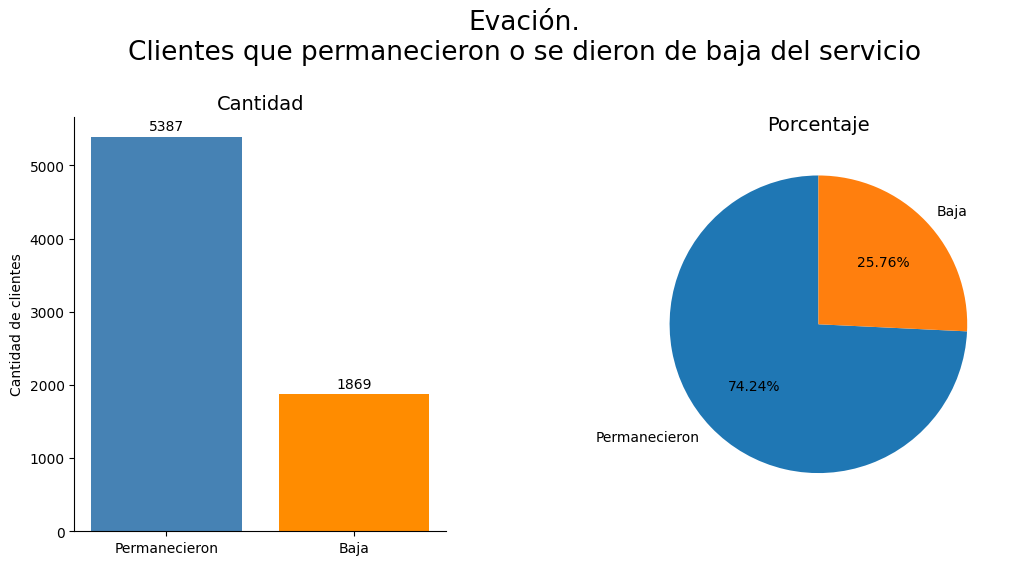

In [259]:
colores = ['steelblue', 'darkorange']
fig, ax = plt.subplots(1,2,figsize=(12,6))
fig.subplots_adjust(hspace=0.5,wspace=0.5,top=0.8)
fig.suptitle('Evación.\nClientes que permanecieron o se dieron de baja del servicio', fontsize=19)

ax[0].bar(evacion['Evacion'],evacion['Cantidad'],color=colores)
ax[0].set_title('Cantidad', fontsize=14)
ax[0].set_ylabel('Cantidad de clientes')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
for i, valor in enumerate(evacion['Cantidad']):
    ax[0].text(i, valor + 50, str(valor), ha='center', va='bottom', fontsize=10)

ax[1].pie(evacion['Cantidad'], labels=evacion['Evacion'], autopct='%1.2f%%', startangle=90)
ax[1].set_title('Porcentaje', fontsize=14)
plt.show()

### **Recuento de evasión por variables categóricas**

#### **Recuento por genero**

In [243]:
df_group = df.groupby(['Churn', 'customer.gender'], observed=True).size().unstack()
df_group

customer.gender,Female,Male
Churn,,
0,2648,2739
1,939,930


Text(0.5, 1.0, 'Porcentaje de clientes\npor genero')

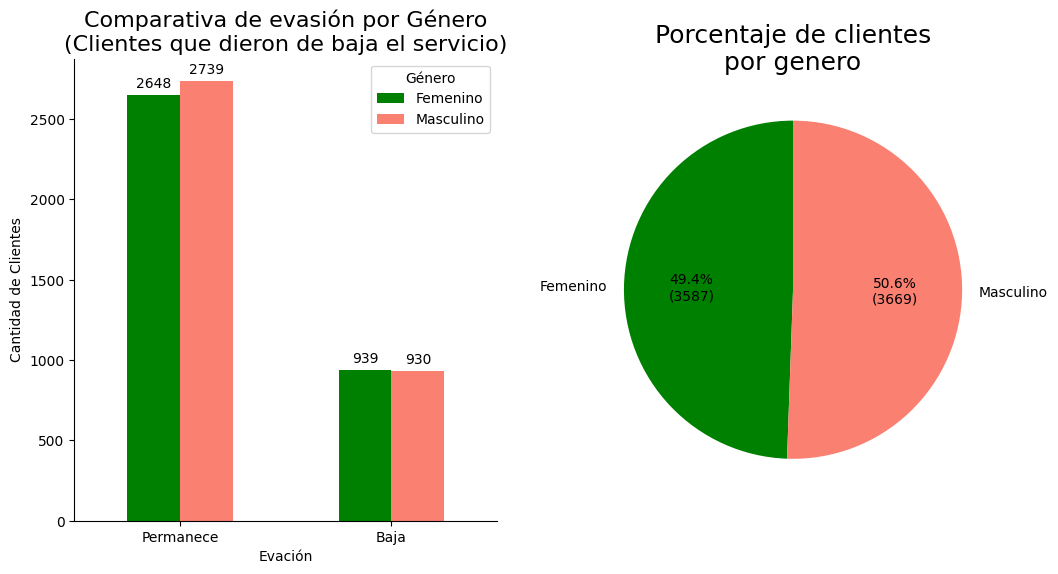

In [269]:
colores=['green', 'salmon']
# Grafica de evación por genero
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
df_group.plot(kind='bar',ax=ax[0],color=colores)
ax[0].set_title('Comparativa de evasión por Género\n(Clientes que dieron de baja el servicio)',fontsize=16)
ax[0].set_ylabel('Cantidad de Clientes')
ax[0].set_xlabel('Evación')
ax[0].legend(title='Género',labels=('Femenino','Masculino'))
ax[0].set_xticklabels(['Permanece', 'Baja'], rotation=0)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
for container in ax[0].containers:
    ax[0].bar_label(container, label_type='edge', padding=3)

# Datos para grafica de porcentaje por cada genero
cantidades = [df_group['Female'].sum(), df_group['Male'].sum()]
etiquetas = ['Femenino', 'Masculino']
# ➕ Función para mostrar porcentaje + cantidad
def etiqueta_pastel(pct, all_vals):
    cantidad = int(round(pct / 100. * sum(all_vals)))
    return f'{pct:.1f}%\n({cantidad})'
ax[1].pie(cantidades, labels=etiquetas, autopct=lambda pct: etiqueta_pastel(pct, cantidades),
          startangle=90,colors=colores)
ax[1].set_title('Porcentaje de clientes\npor genero', fontsize=18)

#### **Recuento por tipo de contrato**

In [242]:
group_contract = df.groupby(['Churn', 'account.Contract'],observed=True).size().unstack()
group_contract


account.Contract,Month-to-month,One year,Two year
Churn,,,
0,2350,1352,1685
1,1655,166,48


Text(0.5, 1.0, 'Porcentaje de clientes\npor tipo de contrato')

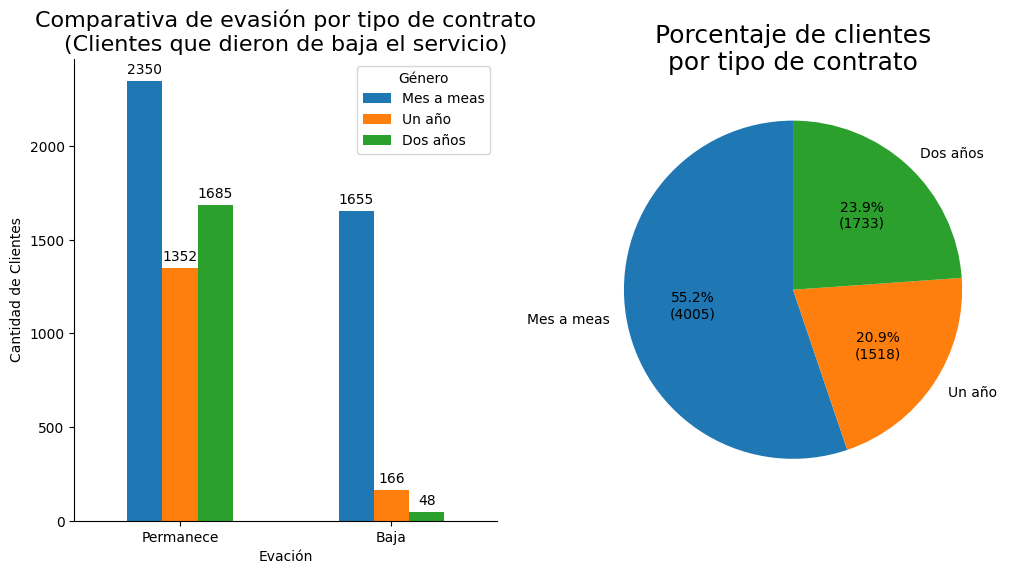

In [267]:
# Grafica de evación por genero
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
group_contract.plot(kind='bar',ax=ax[0])
ax[0].set_title('Comparativa de evasión por tipo de contrato\n(Clientes que dieron de baja el servicio)',
                fontsize=16)
ax[0].set_xlabel('Evación')
ax[0].set_ylabel('Cantidad de Clientes')
ax[0].legend(title='Género',labels=('Mes a meas','Un año','Dos años'))
ax[0].set_xticklabels(['Permanece', 'Baja'], rotation=0)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
for container in ax[0].containers:
    ax[0].bar_label(container, label_type='edge', padding=3)

# Datos para grafica de porcentaje por cada genero
cantidades = [group_contract['Month-to-month'].sum(), group_contract['One year'].sum(),
              group_contract['Two year'].sum()]
etiquetas = ['Mes a meas','Un año','Dos años']
# ➕ Función para mostrar porcentaje + cantidad
def etiqueta_pastel(pct, all_vals):
    cantidad = int(round(pct / 100. * sum(all_vals)))
    return f'{pct:.1f}%\n({cantidad})'
ax[1].pie(cantidades, labels=etiquetas, autopct=lambda pct: etiqueta_pastel(pct, cantidades),
          startangle=90)
ax[1].set_title('Porcentaje de clientes\npor tipo de contrato', fontsize=18)

## **📄Informe final**